Dimensions of the dataset:
[1] 339  11

Summary of the dataset:
 Materials.Id         Formula           Spacegroup        Formation.Energy..eV.
 Length:339         Length:339         Length:339         Min.   :-2.985       
 Class :character   Class :character   Class :character   1st Qu.:-2.757       
 Mode  :character   Mode  :character   Mode  :character   Median :-2.605       
                                                          Mean   :-2.617       
                                                          3rd Qu.:-2.526       
                                                          Max.   :-2.012       
                                                                               
 E.Above.Hull..eV.  Band.Gap..eV.       Nsites       Density..gm.cc.
 Length:339         Min.   :0.000   Min.   : 10.00   Min.   :2.200  
 Class :character   1st Qu.:1.266   1st Qu.: 26.00   1st Qu.:2.760  
 Mode  :character   Median :2.506   Median : 31.00   Median :2.947  
                    

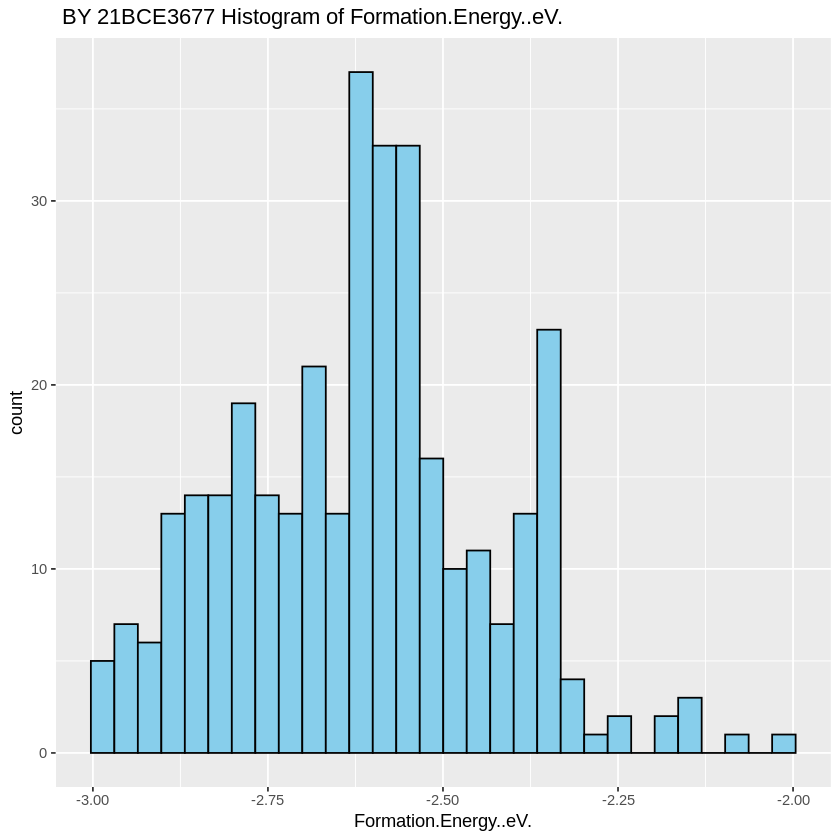

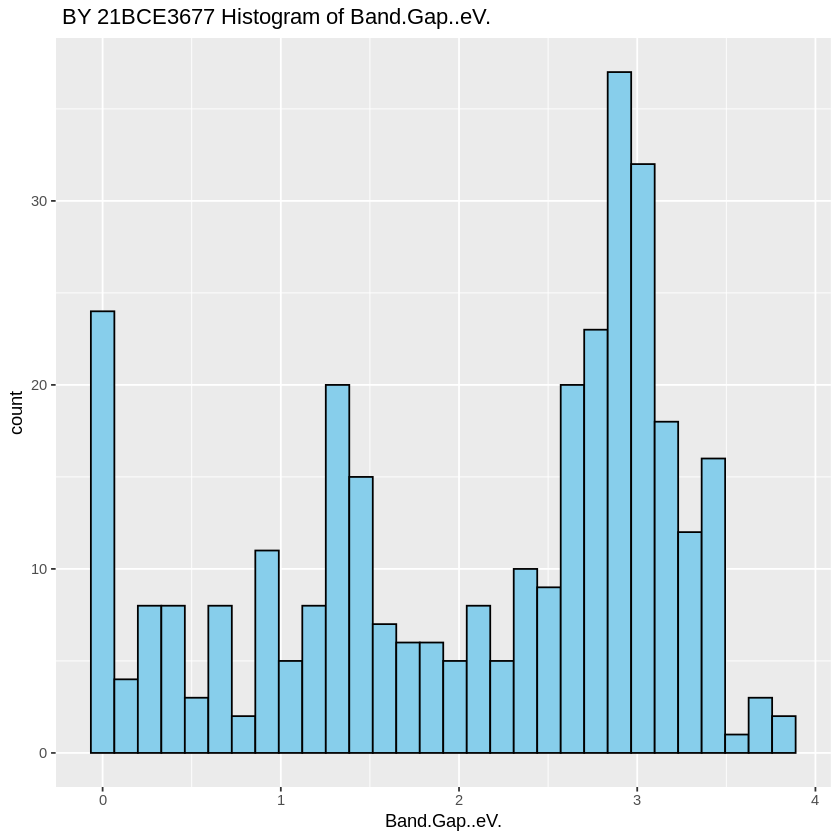

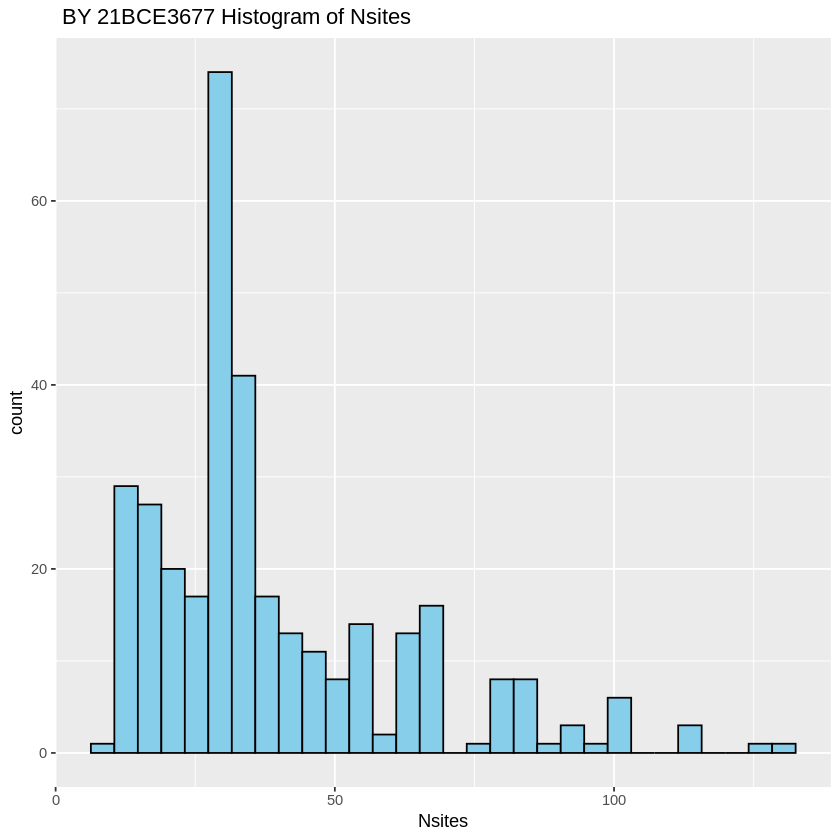

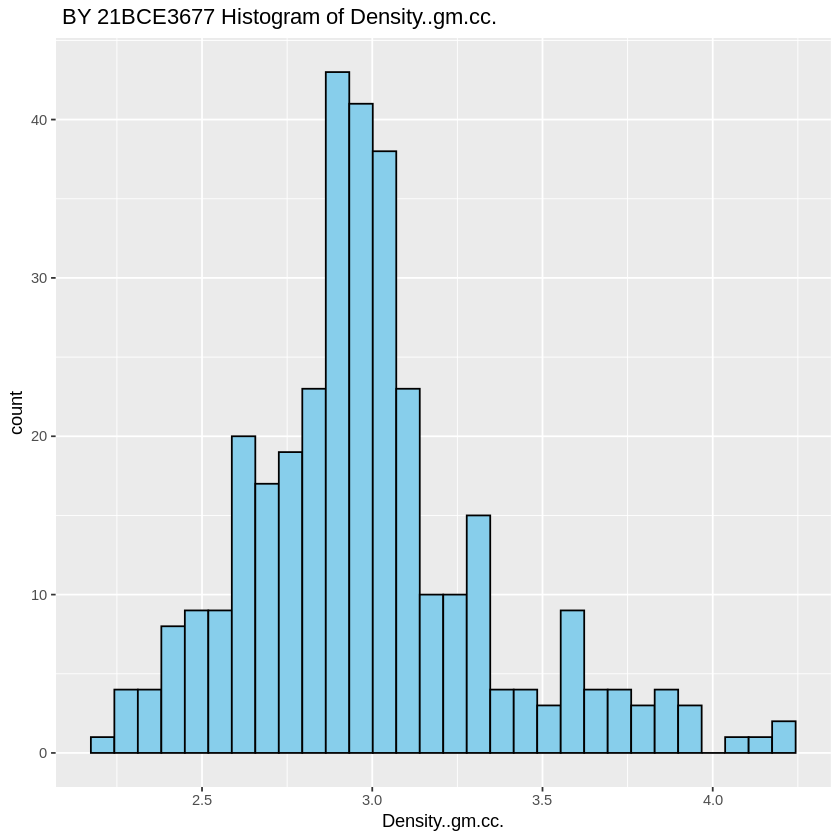

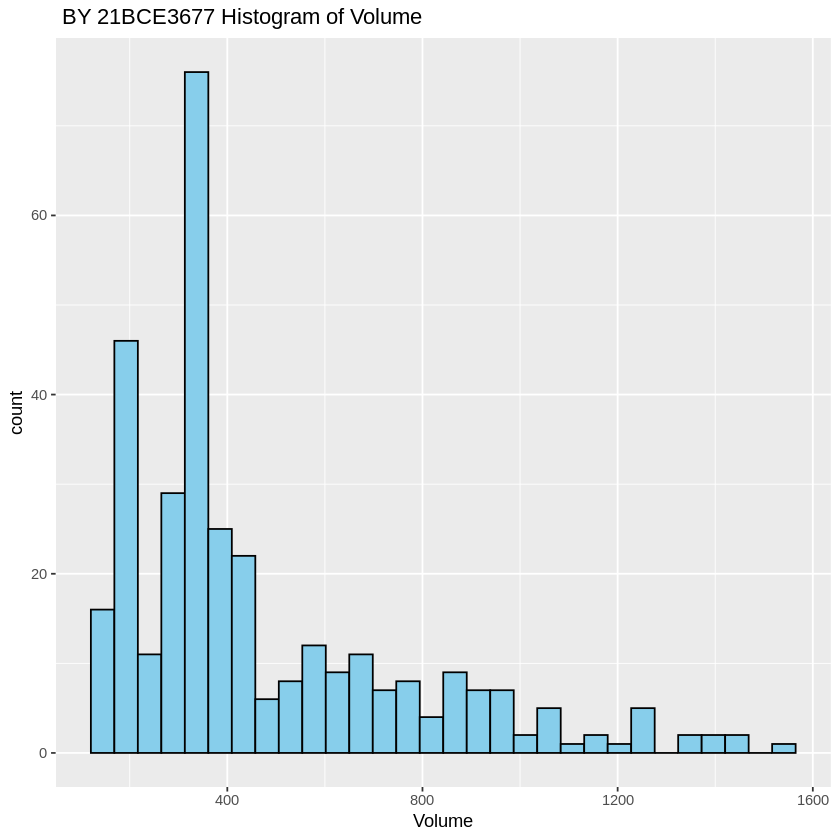

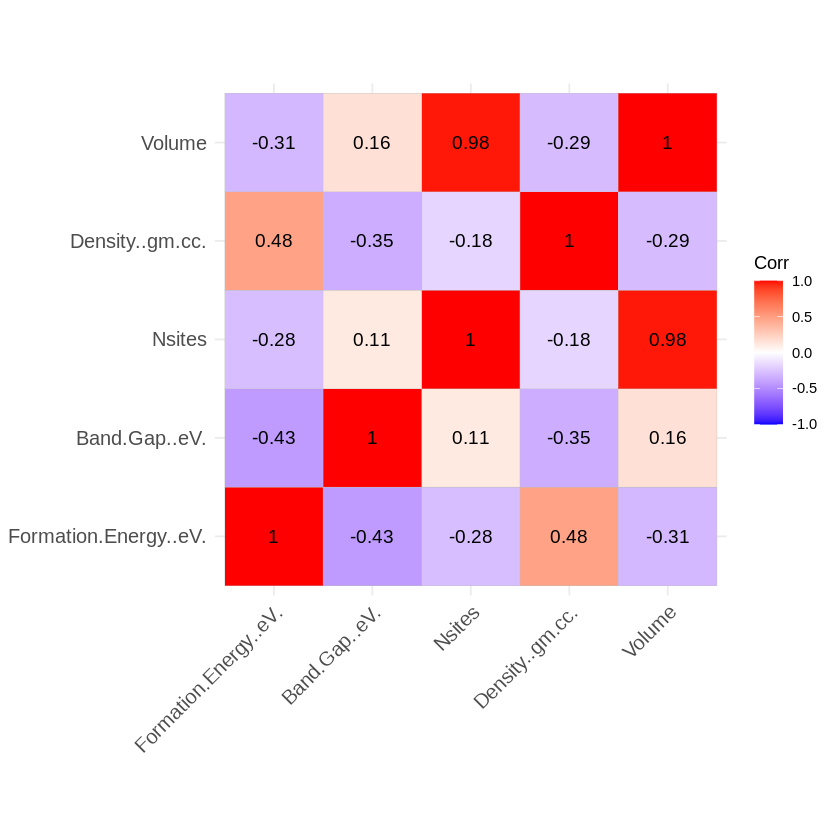

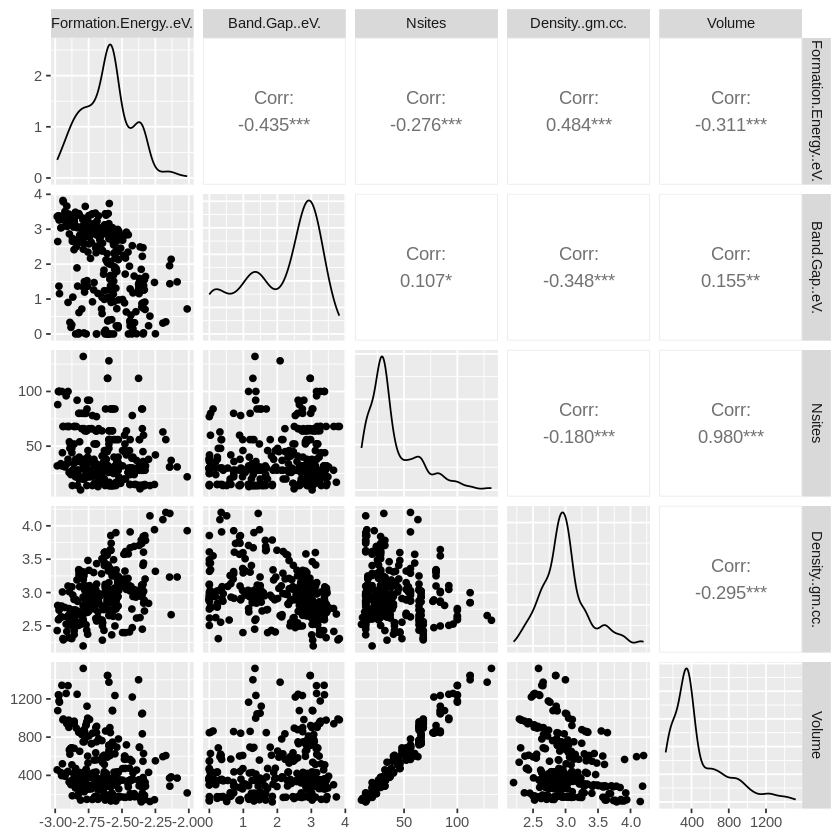

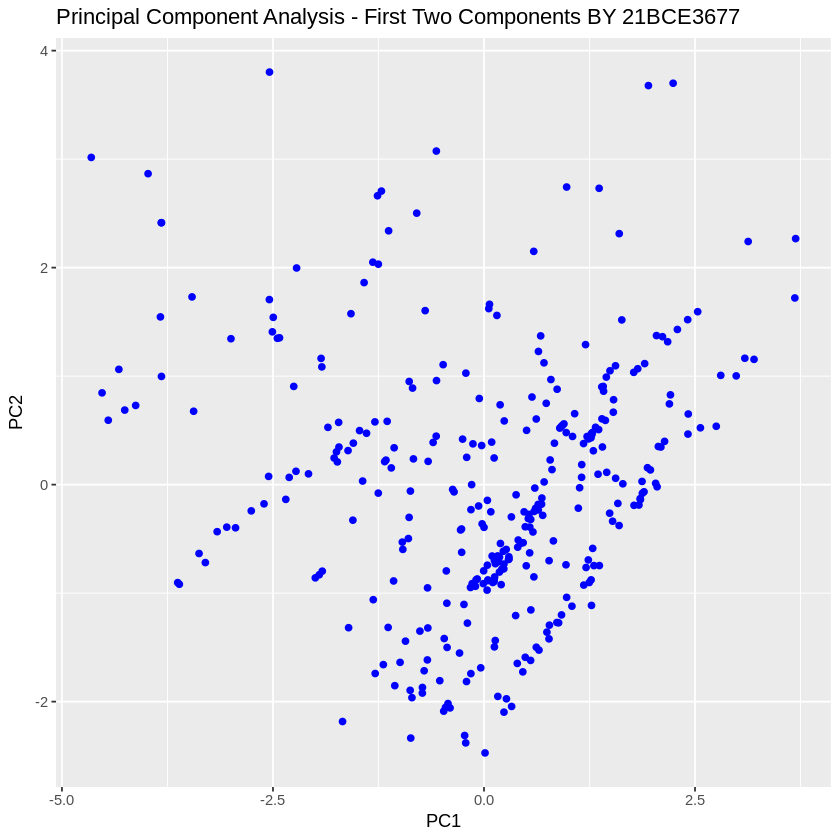

In [22]:
#explore Dimension, Summary, Data Handling, Data Cleaning, Univariate, Bivariate and Multivariate Analysis

if (!require("dplyr")) install.packages("dplyr")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("GGally")) install.packages("GGally")
if (!require("DataExplorer")) install.packages("DataExplorer")
if (!require("ggcorrplot")) install.packages("ggcorrplot")

# Load libraries
library(dplyr)
library(ggplot2)
library(GGally)
library(DataExplorer)

# Load the dataset
url <- "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/lithium-ion%20batteries.csv"
data <- read.csv(url)

# Explore Dataset Dimensions
cat("Dimensions of the dataset:\n")
print(dim(data))

# Summary of the Dataset
cat("\nSummary of the dataset:\n")
print(summary(data))

# Check for Missing Values
cat("\nMissing values in each column:\n")
print(colSums(is.na(data)))

# Data Cleaning - Handle Missing Values
# Removing rows with missing values
data <- na.omit(data)
cat("\nDimensions of the dataset after removing missing values:\n")
print(dim(data))

# Univariate Analysis - Visualize distributions of each variable
# Numerical Columns - Histogram
num_cols <- sapply(data, is.numeric)
for (col in names(data)[num_cols]) {
  print(ggplot(data, aes_string(col)) +
          geom_histogram(fill = "skyblue", color = "black", bins = 30) +
          ggtitle(paste(" BY 21BCE3677 Histogram of", col)))
}

# Categorical Columns - Bar Plot
cat_cols <- sapply(data, is.factor)
for (col in names(data)[cat_cols]) {
  print(ggplot(data, aes_string(col)) +
          geom_bar(fill = "skyblue", color = "black") +
          ggtitle(paste("BY 21BCE3677 Bar Plot of", col)))
}

# Bivariate Analysis - Numerical Columns
# Correlation Heatmap for Numeric Variables
num_data <- data %>% select_if(is.numeric)
cor_matrix <- cor(num_data)
print(ggcorrplot::ggcorrplot(cor_matrix, lab = TRUE))

# Scatter Plots for pairs of numerical variables
print(GGally::ggpairs(num_data))

# Bivariate Analysis - Categorical vs Numerical
# Boxplots of numerical variables for each categorical variable
for (cat_col in names(data)[cat_cols]) {
  for (num_col in names(data)[num_cols]) {
    print(ggplot(data, aes_string(cat_col, num_col)) +
            geom_boxplot(fill = "lightgreen") +
            ggtitle(paste(" BY 21BCE3677 Boxplot of", num_col, "by", cat_col)))
  }
}

# Multivariate Analysis
# Plot of first two Principal Components
pca <- prcomp(num_data, scale. = TRUE)
pca_data <- as.data.frame(pca$x)
print(ggplot(pca_data, aes(x = PC1, y = PC2)) +
        geom_point(color = "blue") +
        ggtitle("Principal Component Analysis - First Two Components BY 21BCE3677"))




In [13]:
#Time Series Analysis with all insights and explore.

if (!require("forecast")) install.packages("forecast")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("lubridate")) install.packages("lubridate")
if (!require("dplyr")) install.packages("dplyr")
if (!require("zoo")) install.packages("zoo")
if (!require("tseries")) install.packages("tseries")

# Load libraries
library(forecast)
library(ggplot2)
library(lubridate)
library(dplyr)
library(zoo)
library(tseries)

# Load the dataset
url <- "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/lithium-ion%20batteries.csv"
data <- read.csv(url)

# Inspect dataset
cat("Dataset Overview:\n")
print(head(data))
cat("\nDataset Structure:\n")
print(str(data))

# Convert to Time Series Format


if ("DateColumn" %in% colnames(data)) {
  data$DateColumn <- as.Date(data$DateColumn) # Convert to Date format
  data <- data %>% arrange(DateColumn) # Arrange by date

  # Assuming a variable for time series analysis, e.g., "BatteryCapacity" or another column
  ts_data <- ts(data$BatteryCapacity, frequency = 12, start = c(year(min(data$DateColumn)), month(min(data$DateColumn))))

  # Plot the Time Series
  print(autoplot(ts_data) +
          ggtitle("Time Series Plot of Battery Capacity") +
          xlab("Time") + ylab("Battery Capacity"))

  # Decomposition of Time Series (Additive)
  ts_decomposed <- decompose(ts_data)
  print(autoplot(ts_decomposed))

  # Seasonal and Trend Analysis
  cat("\nSeasonal and Trend Analysis:\n")
  print(seasonplot(ts_data, 12, col=rainbow(12), year.labels=TRUE, main="Seasonal Plot"))

  # Checking Stationarity - Augmented Dickey-Fuller Test
  adf_test <- adf.test(ts_data, alternative = "stationary")
  cat("\nADF Test for Stationarity:\n")
  print(adf_test)

  # Differencing to make data stationary if needed
  if (adf_test$p.value > 0.05) {
    ts_data_diff <- diff(ts_data)
    print(autoplot(ts_data_diff) +
            ggtitle("Differenced Time Series") +
            xlab("Time") + ylab("Differenced Battery Capacity"))
  } else {
    cat("Data is already stationary.\n")
  }

  # Time Series Forecasting with ARIMA
  arima_model <- auto.arima(ts_data)
  cat("\nARIMA Model Summary:\n")
  print(summary(arima_model))

  # Forecasting
  forecast_ts <- forecast(arima_model, h=12) # Forecast for the next 12 periods
  print(autoplot(forecast_ts) +
          ggtitle("Forecast for Next 12 Periods") +
          xlab("Time") + ylab("Battery Capacity"))

  # Residual Analysis of ARIMA Model
  print(checkresiduals(arima_model))

} else {
  cat("Dataset does not contain a time-based column for Time Series Analysis.\n")
}


Dataset Overview:
  Materials.Id      Formula Spacegroup Formation.Energy..eV. E.Above.Hull..eV.
1    mp-849394    Li2MnSiO4         Pc                -2.699             0.006
2    mp-783909    Li2MnSiO4      P21/c                -2.696             0.008
3    mp-761311   Li4MnSi2O7         Cc                -2.775             0.012
4    mp-761598 Li4Mn2Si3O10       C2/c                -2.783             0.013
5    mp-767709 Li2Mn3Si3O10       C2/c                -2.747             0.016
6    mp-761517   Li4MnSi2O7         C2                -2.763             0.024
  Band.Gap..eV. Nsites Density..gm.cc.  Volume Has.Bandstructure Crystal.System
1         3.462     16           2.993 178.513              TRUE     monoclinic
2         2.879     32           2.926 365.272              TRUE     monoclinic
3         3.653     28           2.761 301.775              TRUE     monoclinic
4         3.015     38           2.908 436.183              TRUE     monoclinic
5         2.578     36       

Dataset Overview:
  Materials.Id      Formula Spacegroup Formation.Energy..eV. E.Above.Hull..eV.
1    mp-849394    Li2MnSiO4         Pc                -2.699             0.006
2    mp-783909    Li2MnSiO4      P21/c                -2.696             0.008
3    mp-761311   Li4MnSi2O7         Cc                -2.775             0.012
4    mp-761598 Li4Mn2Si3O10       C2/c                -2.783             0.013
5    mp-767709 Li2Mn3Si3O10       C2/c                -2.747             0.016
6    mp-761517   Li4MnSi2O7         C2                -2.763             0.024
  Band.Gap..eV. Nsites Density..gm.cc.  Volume Has.Bandstructure Crystal.System
1         3.462     16           2.993 178.513              TRUE     monoclinic
2         2.879     32           2.926 365.272              TRUE     monoclinic
3         3.653     28           2.761 301.775              TRUE     monoclinic
4         3.015     38           2.908 436.183              TRUE     monoclinic
5         2.578     36       

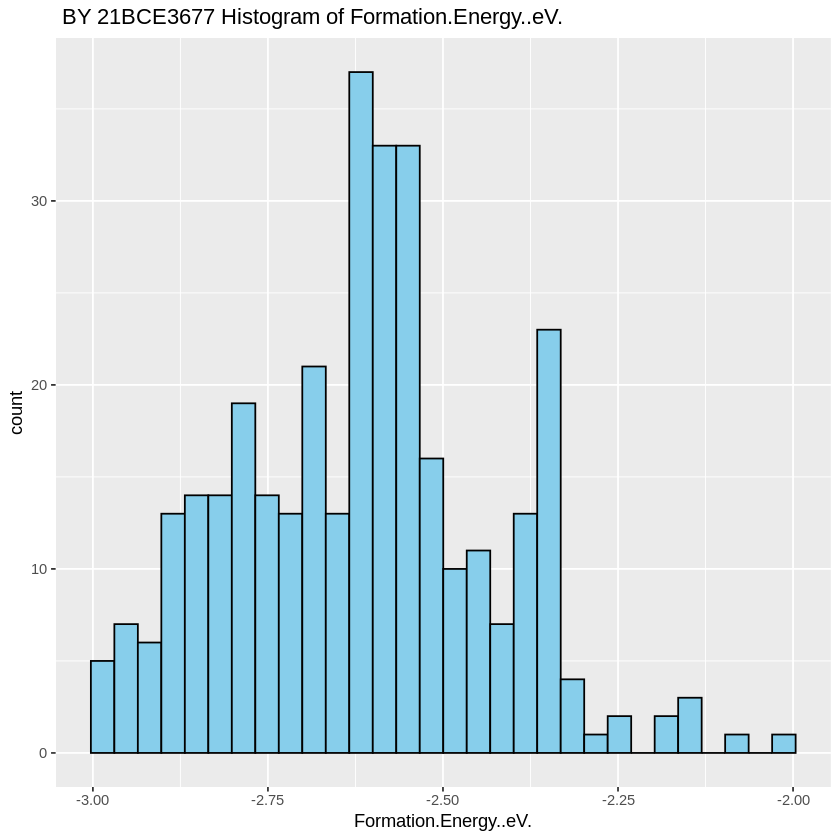

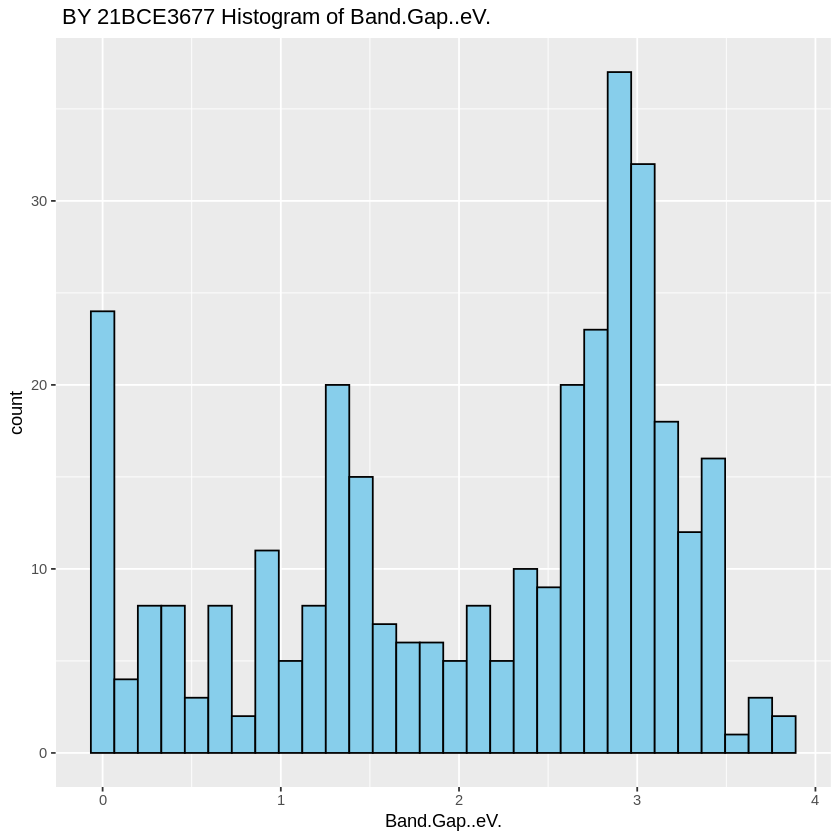

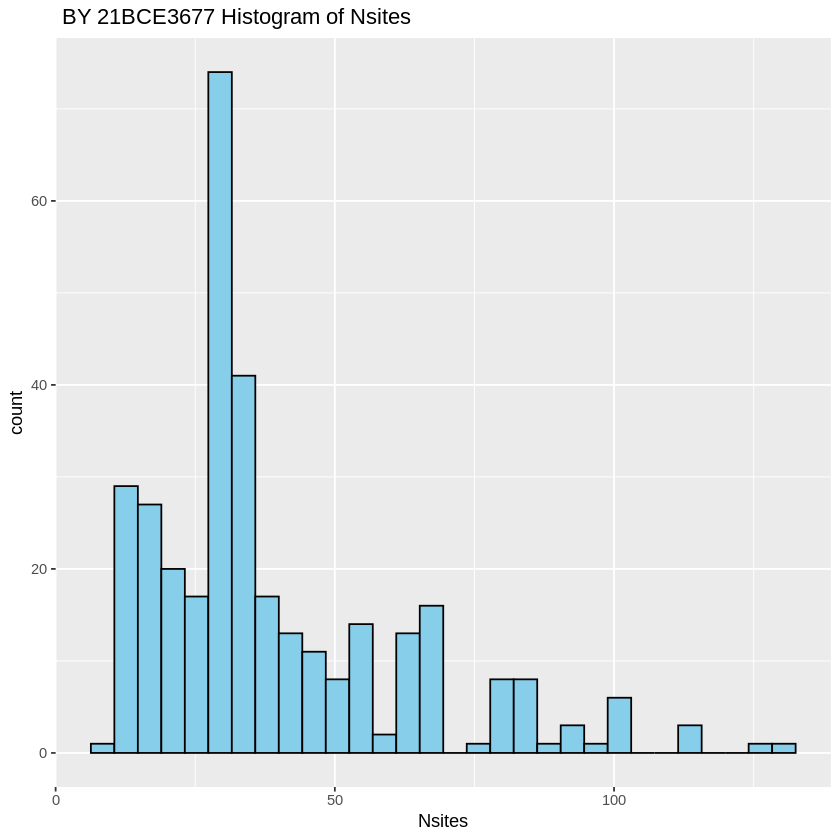

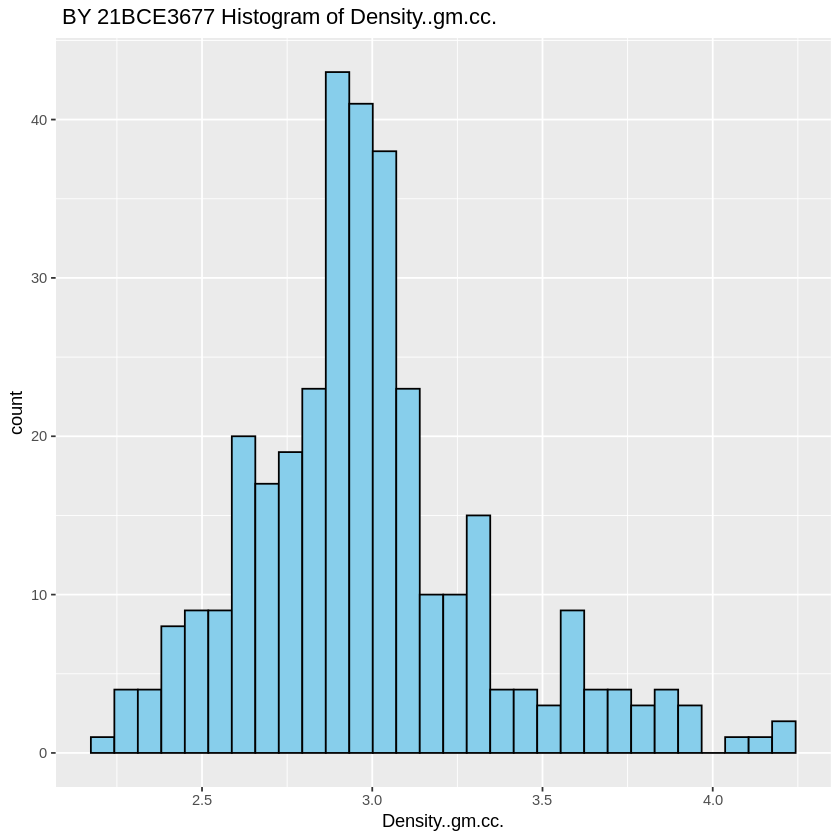

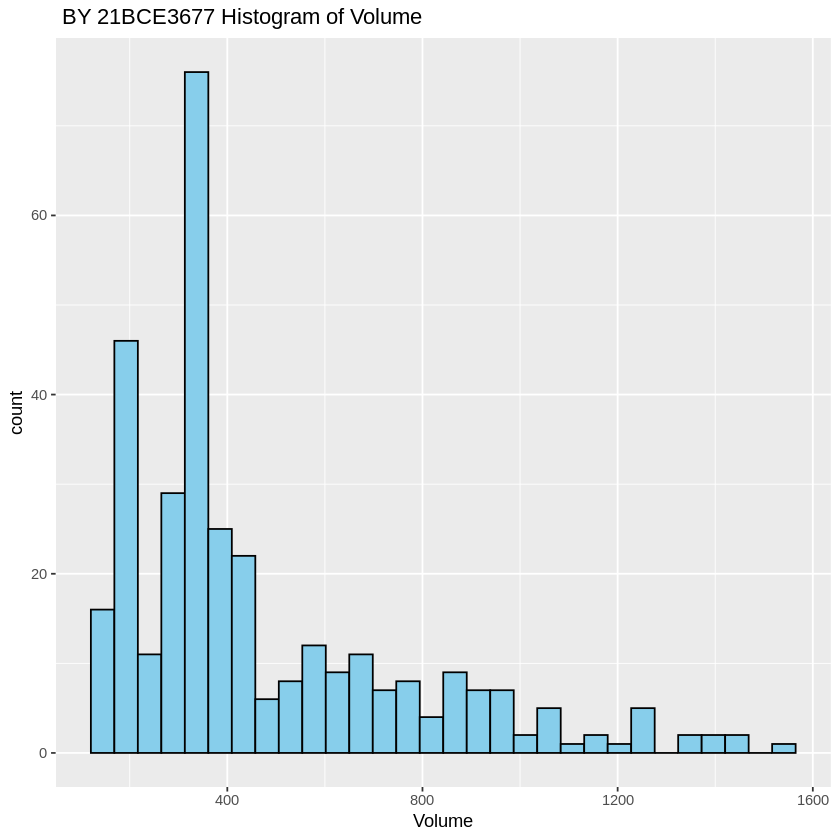

                      Formation.Energy..eV. Band.Gap..eV.     Nsites
Formation.Energy..eV.             1.0000000    -0.4346179 -0.2762642
Band.Gap..eV.                    -0.4346179     1.0000000  0.1073180
Nsites                           -0.2762642     0.1073180  1.0000000
Density..gm.cc.                   0.4839901    -0.3480073 -0.1798686
Volume                           -0.3105461     0.1552842  0.9803021
                      Density..gm.cc.     Volume
Formation.Energy..eV.       0.4839901 -0.3105461
Band.Gap..eV.              -0.3480073  0.1552842
Nsites                     -0.1798686  0.9803021
Density..gm.cc.             1.0000000 -0.2948525
Volume                     -0.2948525  1.0000000


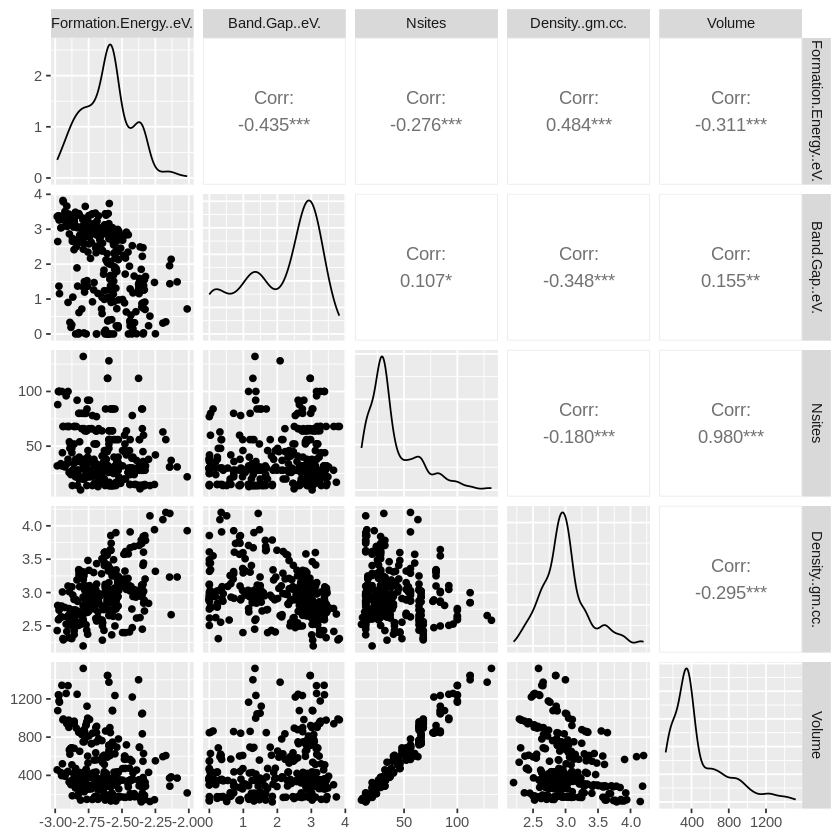

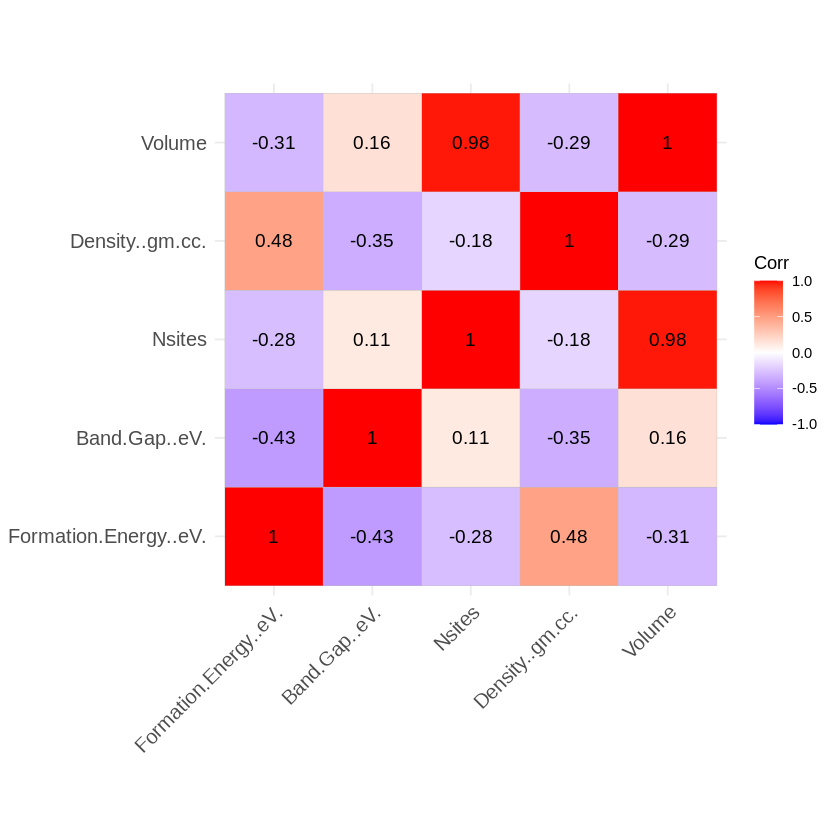

HTML widgets cannot be represented in plain text (need html)

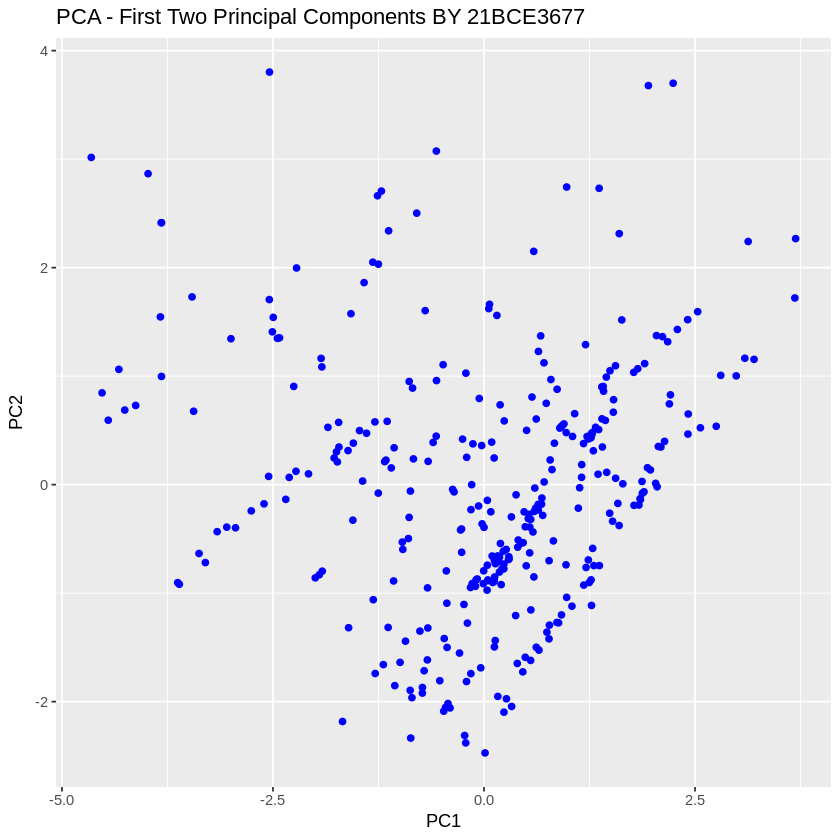

In [23]:
 #2D and N-D analysis

if (!require("dplyr")) install.packages("dplyr")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("GGally")) install.packages("GGally")
if (!require("DataExplorer")) install.packages("DataExplorer")
if (!require("plotly")) install.packages("plotly")

# Load libraries
library(dplyr)
library(ggplot2)
library(GGally)
library(DataExplorer)
library(plotly)

# Load the dataset
url <- "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/lithium-ion%20batteries.csv"
data <- read.csv(url)

# Inspect dataset
cat("Dataset Overview:\n")
print(head(data))
cat("\nDataset Structure:\n")
print(str(data))

# Summary of the Dataset
cat("\nSummary of the dataset:\n")
print(summary(data))

# Check for Missing Values
cat("\nMissing values in each column:\n")
print(colSums(is.na(data)))

# Data Cleaning - Handle Missing Values
# Removing rows with missing values as an example
data <- na.omit(data)
cat("\nDimensions of the dataset after removing missing values:\n")
print(dim(data))

# ----- 2D Analysis -----

# Histograms for Numerical Columns
num_cols <- sapply(data, is.numeric)
for (col in names(data)[num_cols]) {
  print(ggplot(data, aes_string(col)) +
          geom_histogram(fill = "skyblue", color = "black", bins = 30) +
          ggtitle(paste(" BY 21BCE3677 Histogram of", col)))
}

# Boxplots for Categorical vs Numerical Columns

cat_cols <- sapply(data, is.factor)
for (cat_col in names(data)[cat_cols]) {
  for (num_col in names(data)[num_cols]) {
    print(ggplot(data, aes_string(cat_col, num_col)) +
            geom_boxplot(fill = "lightgreen") +
            ggtitle(paste("BY 21BCE3677 Boxplot of", num_col, "by", cat_col)))
  }
}

# Pairwise Scatter Plots - 2D Bivariate Analysis

print(GGally::ggpairs(data %>% select_if(is.numeric)))

# ----- N-Dimensional Analysis -----

# Correlation Matrix for Numeric Variables
cor_matrix <- cor(data %>% select_if(is.numeric))
print(cor_matrix)
print(ggcorrplot::ggcorrplot(cor_matrix, lab = TRUE))

# Principal Component Analysis (PCA) - For dimensionality reduction visualization
pca <- prcomp(data %>% select_if(is.numeric), scale. = TRUE)
pca_data <- as.data.frame(pca$x)
print(ggplot(pca_data, aes(x = PC1, y = PC2)) +
        geom_point(color = "blue") +
        ggtitle("PCA - First Two Principal Components BY 21BCE3677"))

# 3D Plot of Principal Components (PC1, PC2, PC3) using plotly for interactive visualization
pca_data_3d <- pca_data %>% select(PC1, PC2, PC3)
plot_ly(data = pca_data_3d, x = ~PC1, y = ~PC2, z = ~PC3, type = "scatter3d", mode = "markers") %>%
  layout(title = "3D PCA Plot of First Three Components BY 21BCE3677")




Dataset Overview:
  Materials.Id      Formula Spacegroup Formation.Energy..eV. E.Above.Hull..eV.
1    mp-849394    Li2MnSiO4         Pc                -2.699             0.006
2    mp-783909    Li2MnSiO4      P21/c                -2.696             0.008
3    mp-761311   Li4MnSi2O7         Cc                -2.775             0.012
4    mp-761598 Li4Mn2Si3O10       C2/c                -2.783             0.013
5    mp-767709 Li2Mn3Si3O10       C2/c                -2.747             0.016
6    mp-761517   Li4MnSi2O7         C2                -2.763             0.024
  Band.Gap..eV. Nsites Density..gm.cc.  Volume Has.Bandstructure Crystal.System
1         3.462     16           2.993 178.513              TRUE     monoclinic
2         2.879     32           2.926 365.272              TRUE     monoclinic
3         3.653     28           2.761 301.775              TRUE     monoclinic
4         3.015     38           2.908 436.183              TRUE     monoclinic
5         2.578     36       

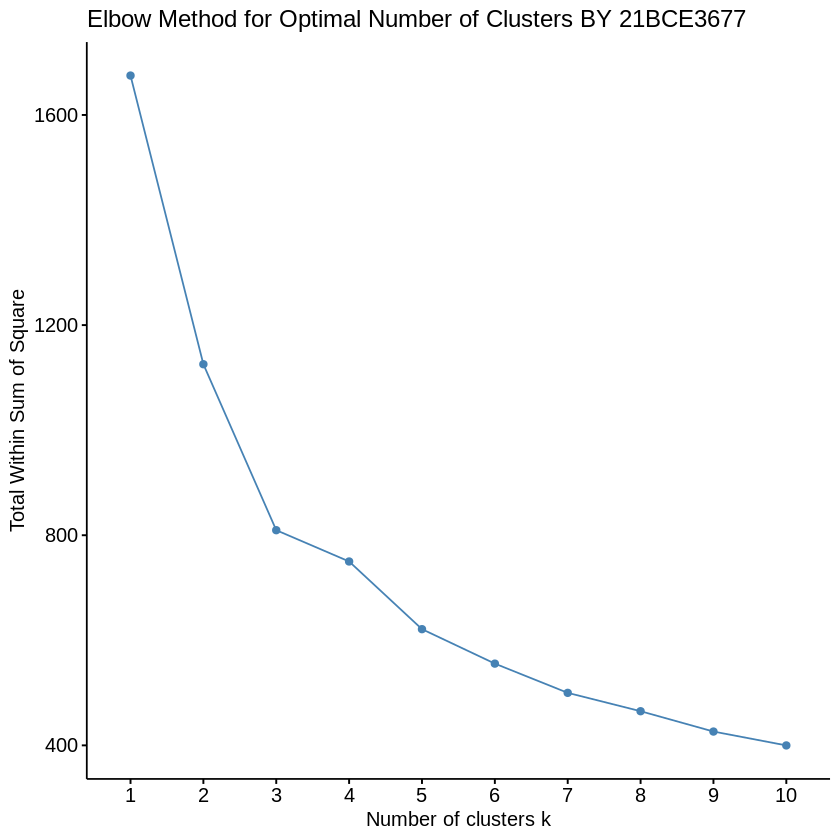


Cluster Centers:
  Formation.Energy..eV. Band.Gap..eV.     Nsites Density..gm.cc.     Volume
1            -0.3241762     0.5858387 -0.4372437      -0.2615655 -0.4223860
2            -0.6256739     0.3514359  1.5695302      -0.4794821  1.5995707
3             0.8688604    -1.0459430 -0.4516746       0.6839967 -0.4924142

Cluster Sizes:
[1] 152  74 110


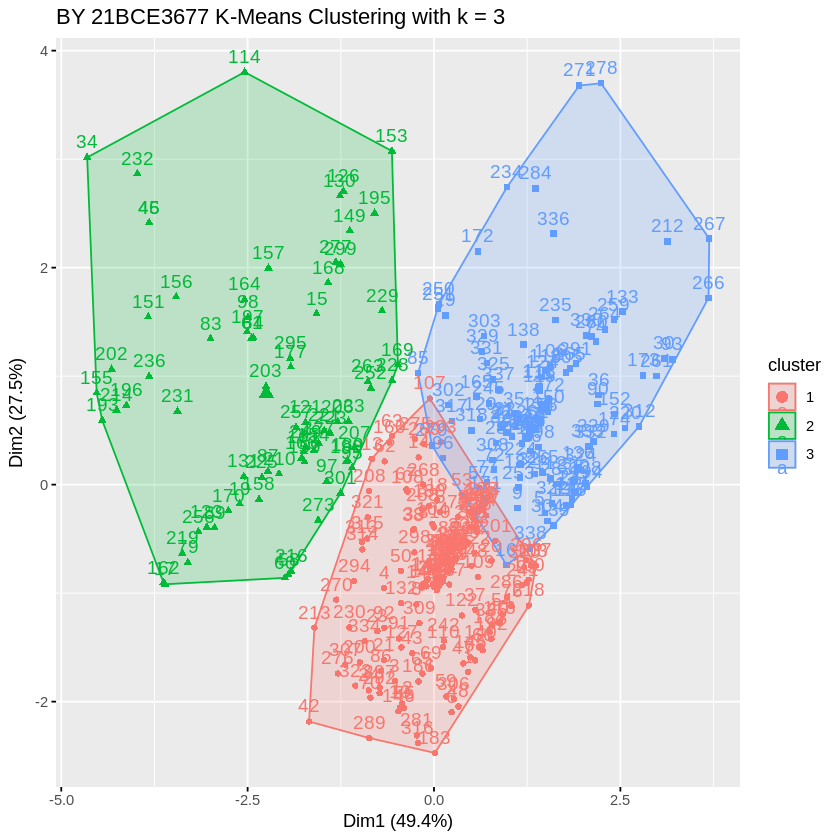

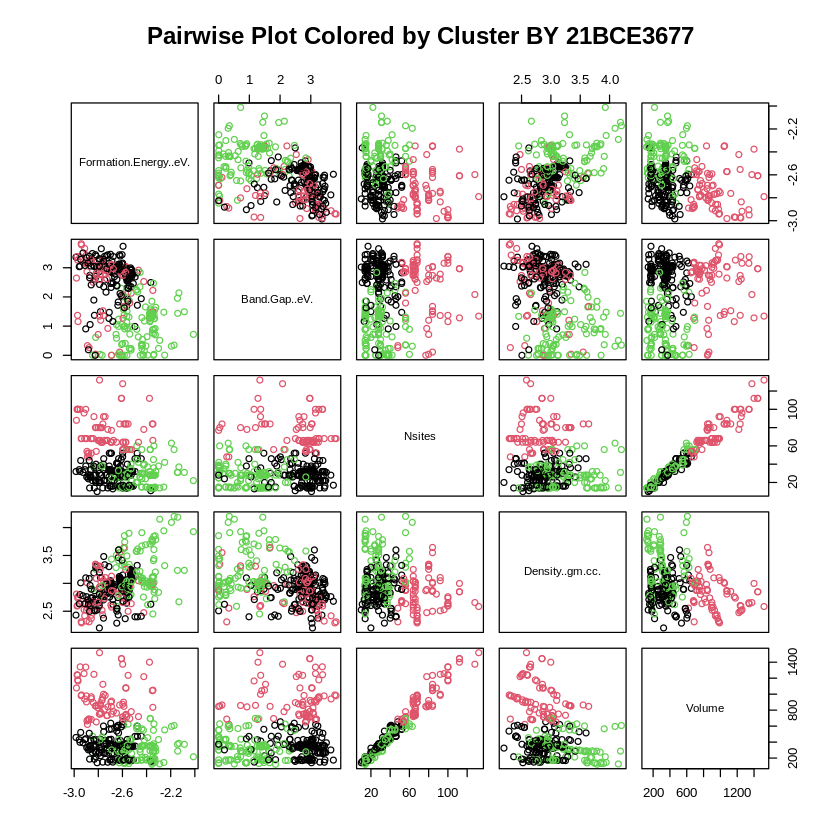

In [24]:
#K-Means Clustering

if (!require("dplyr")) install.packages("dplyr")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("factoextra")) install.packages("factoextra")

# Load libraries
library(dplyr)
library(ggplot2)
library(factoextra)

# Load the dataset
url <- "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/lithium-ion%20batteries.csv"
data <- read.csv(url)

# Inspect dataset
cat("Dataset Overview:\n")
print(head(data))
cat("\nDataset Structure:\n")
print(str(data))

# Summary of the Dataset
cat("\nSummary of the dataset:\n")
print(summary(data))

# Data Cleaning - Handle Missing Values
# Removing rows with missing values
data <- na.omit(data)
cat("\nDimensions of the dataset after removing missing values:\n")
print(dim(data))

# Select Numeric Columns for Clustering
data_numeric <- data %>% select_if(is.numeric)

# Scaling the Data
data_scaled <- scale(data_numeric)

# Determine Optimal Number of Clusters using Elbow Method
fviz_nbclust(data_scaled, kmeans, method = "wss") +
  ggtitle("Elbow Method for Optimal Number of Clusters BY 21BCE3677")

# Perform K-Means Clustering

set.seed(123)
k <- 3
kmeans_result <- kmeans(data_scaled, centers = k, nstart = 25)

# Add Cluster Labels to the Dataset
data$Cluster <- as.factor(kmeans_result$cluster)

# Cluster Visualization
print(fviz_cluster(kmeans_result, data = data_scaled) +
        ggtitle(paste("BY 21BCE3677 K-Means Clustering with k =", k)))

# Summary of Cluster Centers
cat("\nCluster Centers:\n")
print(kmeans_result$centers)

# Summary of Cluster Sizes
cat("\nCluster Sizes:\n")
print(kmeans_result$size)

# Additional Visualization - Pairwise Plot by Cluster
pairs(data_numeric, col = data$Cluster,
      main = "Pairwise Plot Colored by Cluster BY 21BCE3677")


Dataset Overview:
  Materials.Id      Formula Spacegroup Formation.Energy..eV. E.Above.Hull..eV.
1    mp-849394    Li2MnSiO4         Pc                -2.699             0.006
2    mp-783909    Li2MnSiO4      P21/c                -2.696             0.008
3    mp-761311   Li4MnSi2O7         Cc                -2.775             0.012
4    mp-761598 Li4Mn2Si3O10       C2/c                -2.783             0.013
5    mp-767709 Li2Mn3Si3O10       C2/c                -2.747             0.016
6    mp-761517   Li4MnSi2O7         C2                -2.763             0.024
  Band.Gap..eV. Nsites Density..gm.cc.  Volume Has.Bandstructure Crystal.System
1         3.462     16           2.993 178.513              TRUE     monoclinic
2         2.879     32           2.926 365.272              TRUE     monoclinic
3         3.653     28           2.761 301.775              TRUE     monoclinic
4         3.015     38           2.908 436.183              TRUE     monoclinic
5         2.578     36       

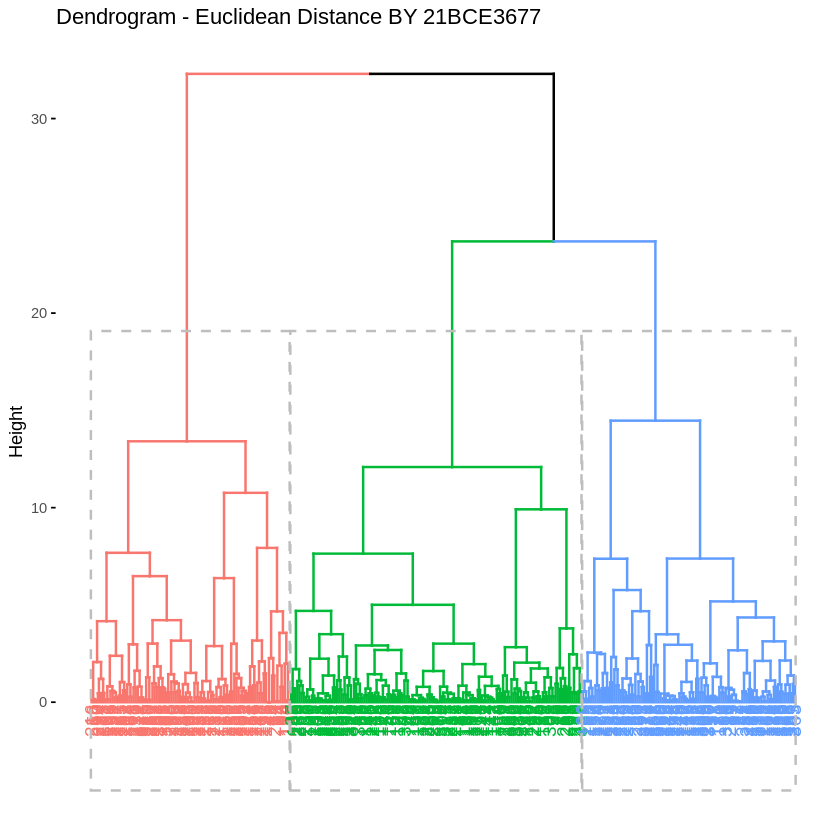

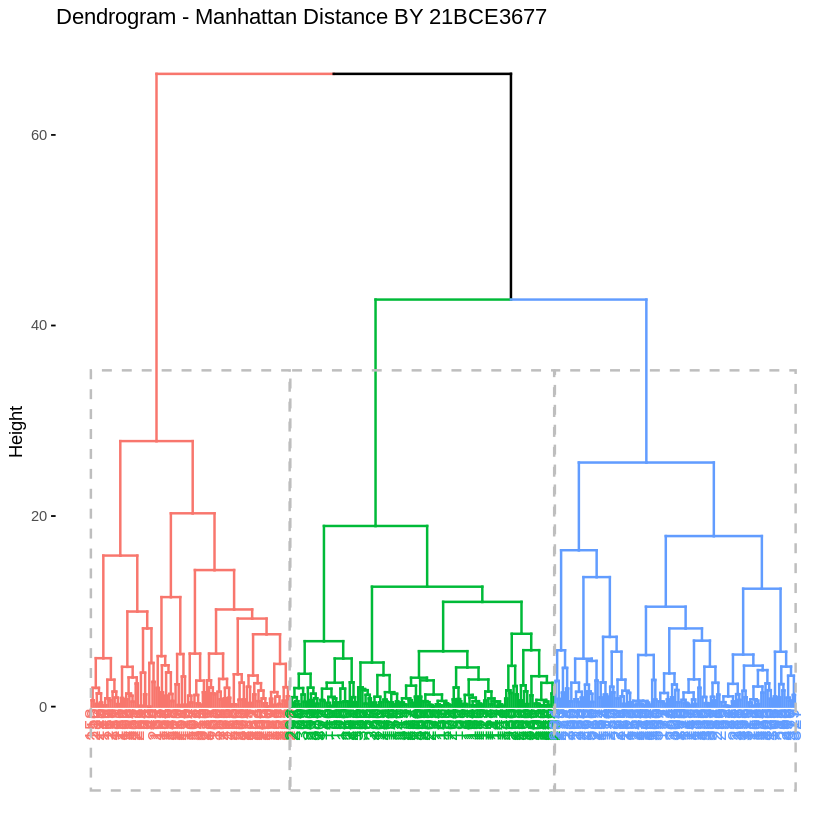

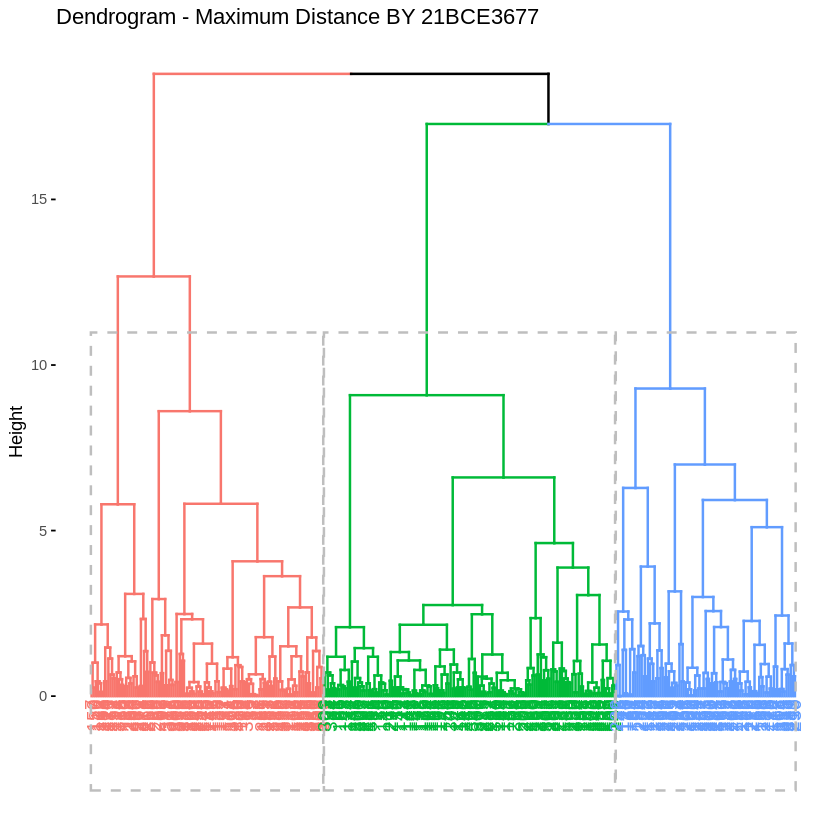

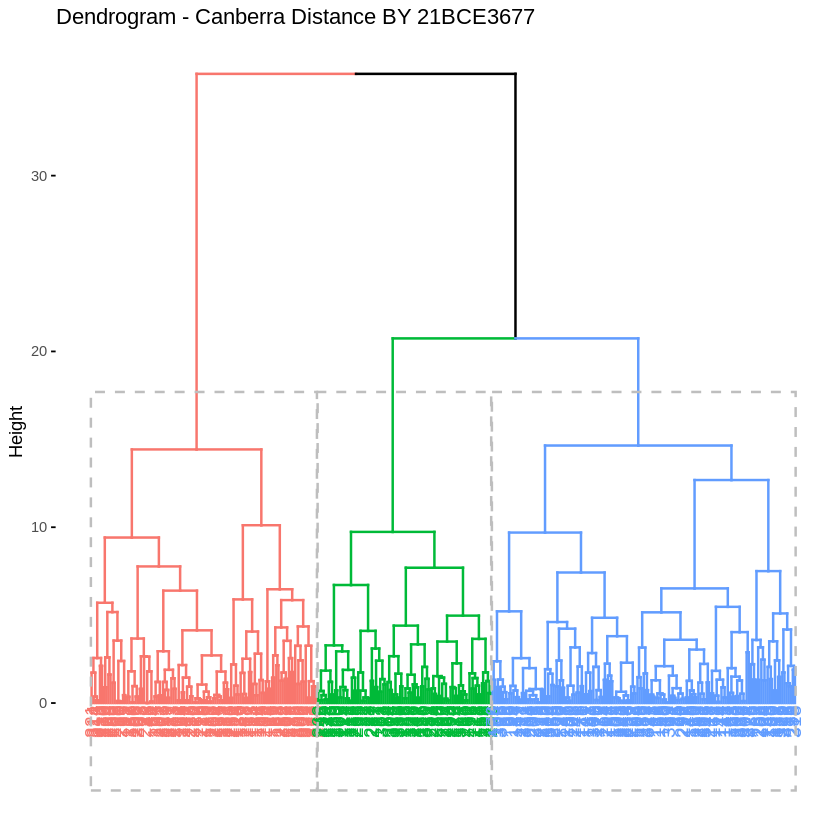


Cluster Assignments (First 10 Rows):
   Cluster_Euclidean Cluster_Manhattan Cluster_Maximum Cluster_Canberra
1                  1                 1               1                1
2                  1                 1               1                1
3                  1                 1               1                1
4                  1                 1               1                1
5                  1                 1               1                1
6                  1                 1               1                1
7                  2                 2               2                2
8                  1                 1               1                1
9                  1                 2               2                1
10                 1                 1               1                1
   Cluster_Minkowski
1                  1
2                  1
3                  1
4                  1
5                  1
6                  1
7                  2
8 

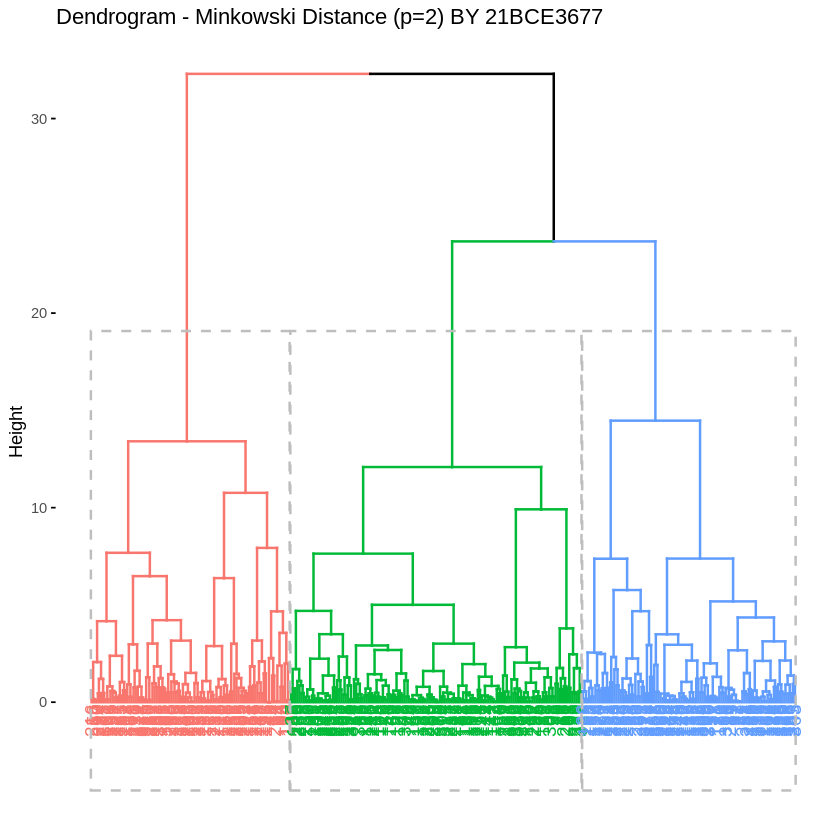

In [25]:
# Hierarchical Clustering

if (!require("dplyr")) install.packages("dplyr")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("factoextra")) install.packages("factoextra")

# Load libraries
library(dplyr)
library(ggplot2)
library(factoextra)

# Load the dataset
url <- "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/lithium-ion%20batteries.csv"
data <- read.csv(url)

# Inspect dataset
cat("Dataset Overview:\n")
print(head(data))
cat("\nDataset Structure:\n")
print(str(data))

# Summary of the Dataset
cat("\nSummary of the dataset:\n")
print(summary(data))

# Data Cleaning - Handle Missing Values
# Removing rows with missing values
data <- na.omit(data)
cat("\nDimensions of the dataset after removing missing values:\n")
print(dim(data))

# Select Numeric Columns for Clustering
data_numeric <- data %>% select_if(is.numeric)

# Scaling the Data
data_scaled <- scale(data_numeric)

# Hierarchical Clustering with Different Distance Measures

# 1. Euclidean Distance
dist_euclidean <- dist(data_scaled, method = "euclidean")
hc_euclidean <- hclust(dist_euclidean, method = "ward.D2")
print(fviz_dend(hc_euclidean, k = 3, rect = TRUE, main = "Dendrogram - Euclidean Distance BY 21BCE3677"))

# 2. Manhattan Distance
dist_manhattan <- dist(data_scaled, method = "manhattan")
hc_manhattan <- hclust(dist_manhattan, method = "ward.D2")
print(fviz_dend(hc_manhattan, k = 3, rect = TRUE, main = "Dendrogram - Manhattan Distance BY 21BCE3677"))

# 3. Maximum Distance
dist_maximum <- dist(data_scaled, method = "maximum")
hc_maximum <- hclust(dist_maximum, method = "ward.D2")
print(fviz_dend(hc_maximum, k = 3, rect = TRUE, main = "Dendrogram - Maximum Distance BY 21BCE3677"))

# 4. Canberra Distance
dist_canberra <- dist(data_scaled, method = "canberra")
hc_canberra <- hclust(dist_canberra, method = "ward.D2")
print(fviz_dend(hc_canberra, k = 3, rect = TRUE, main = "Dendrogram - Canberra Distance BY 21BCE3677"))

# 5. Minkowski Distance

dist_minkowski <- dist(data_scaled, method = "minkowski", p = 2)
hc_minkowski <- hclust(dist_minkowski, method = "ward.D2")
print(fviz_dend(hc_minkowski, k = 3, rect = TRUE, main = "Dendrogram - Minkowski Distance (p=2) BY 21BCE3677"))

# Cut tree into clusters and add to dataset for further analysis
data$Cluster_Euclidean <- cutree(hc_euclidean, k = 3)
data$Cluster_Manhattan <- cutree(hc_manhattan, k = 3)
data$Cluster_Maximum <- cutree(hc_maximum, k = 3)
data$Cluster_Canberra <- cutree(hc_canberra, k = 3)
data$Cluster_Minkowski <- cutree(hc_minkowski, k = 3)

# Display cluster assignments
cat("\nCluster Assignments (First 10 Rows):\n")
print(head(data[, c("Cluster_Euclidean", "Cluster_Manhattan", "Cluster_Maximum", "Cluster_Canberra", "Cluster_Minkowski")], 10))


Dataset Overview:
  Materials.Id      Formula Spacegroup Formation.Energy..eV. E.Above.Hull..eV.
1    mp-849394    Li2MnSiO4         Pc                -2.699             0.006
2    mp-783909    Li2MnSiO4      P21/c                -2.696             0.008
3    mp-761311   Li4MnSi2O7         Cc                -2.775             0.012
4    mp-761598 Li4Mn2Si3O10       C2/c                -2.783             0.013
5    mp-767709 Li2Mn3Si3O10       C2/c                -2.747             0.016
6    mp-761517   Li4MnSi2O7         C2                -2.763             0.024
  Band.Gap..eV. Nsites Density..gm.cc.  Volume Has.Bandstructure Crystal.System
1         3.462     16           2.993 178.513              TRUE     monoclinic
2         2.879     32           2.926 365.272              TRUE     monoclinic
3         3.653     28           2.761 301.775              TRUE     monoclinic
4         3.015     38           2.908 436.183              TRUE     monoclinic
5         2.578     36       

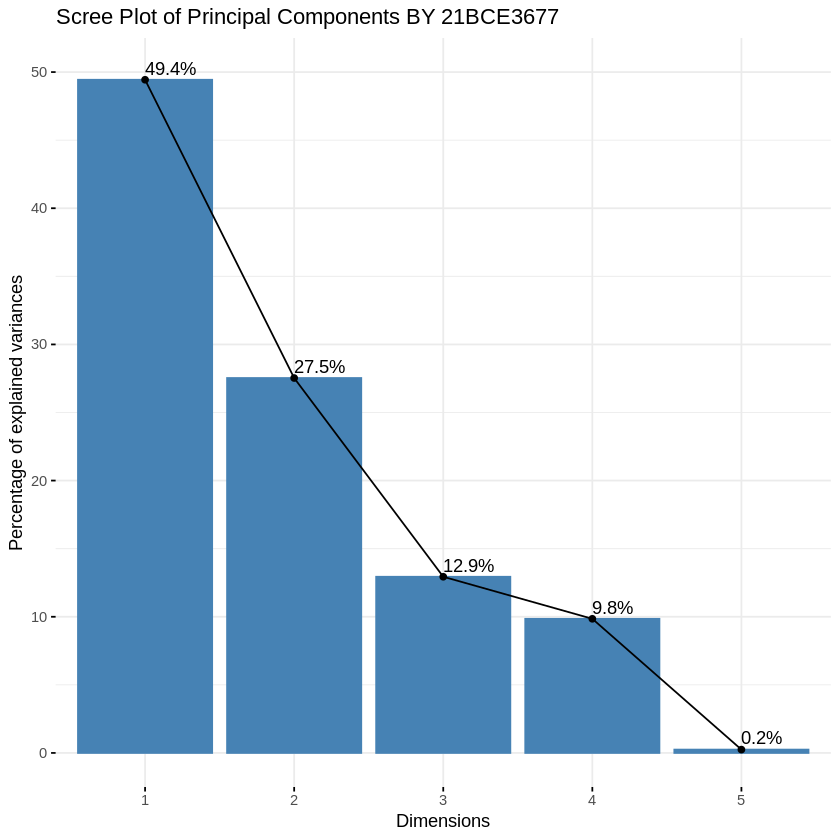

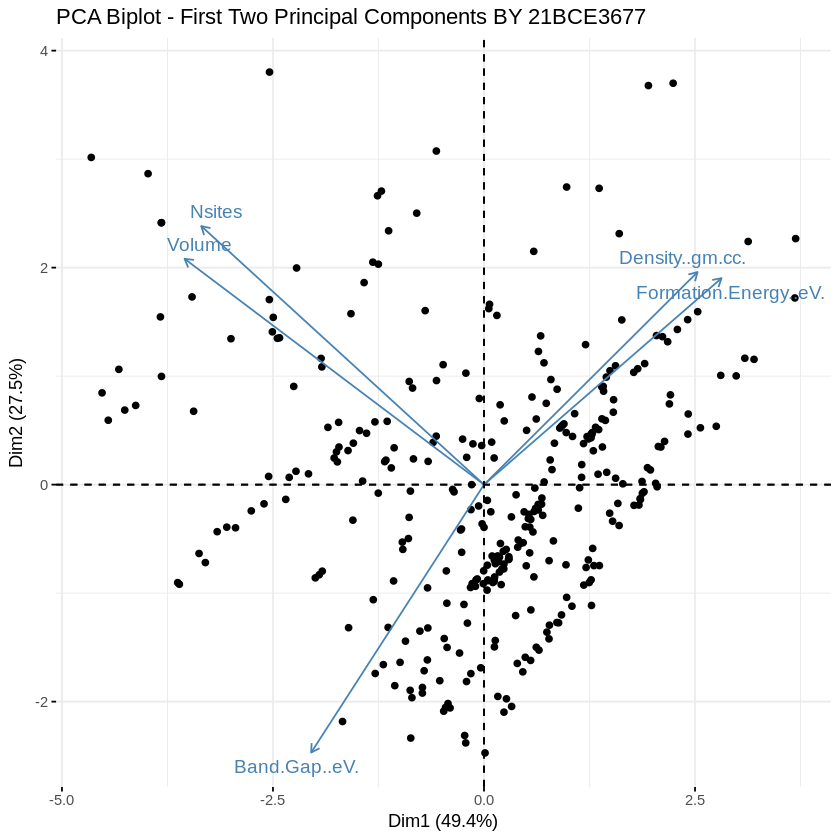

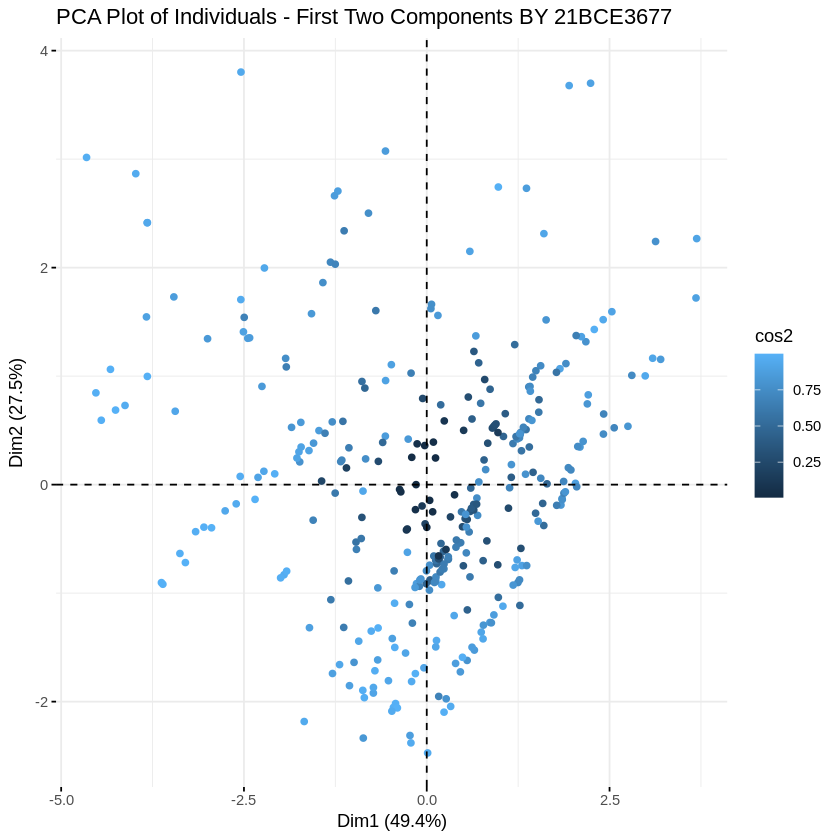


Dataset with Principal Components:
  Materials.Id      Formula Spacegroup Formation.Energy..eV. E.Above.Hull..eV.
1    mp-849394    Li2MnSiO4         Pc                -2.699             0.006
2    mp-783909    Li2MnSiO4      P21/c                -2.696             0.008
3    mp-761311   Li4MnSi2O7         Cc                -2.775             0.012
4    mp-761598 Li4Mn2Si3O10       C2/c                -2.783             0.013
5    mp-767709 Li2Mn3Si3O10       C2/c                -2.747             0.016
6    mp-761517   Li4MnSi2O7         C2                -2.763             0.024
  Band.Gap..eV. Nsites Density..gm.cc.  Volume Has.Bandstructure Crystal.System
1         3.462     16           2.993 178.513              TRUE     monoclinic
2         2.879     32           2.926 365.272              TRUE     monoclinic
3         3.653     28           2.761 301.775              TRUE     monoclinic
4         3.015     38           2.908 436.183              TRUE     monoclinic
5         2

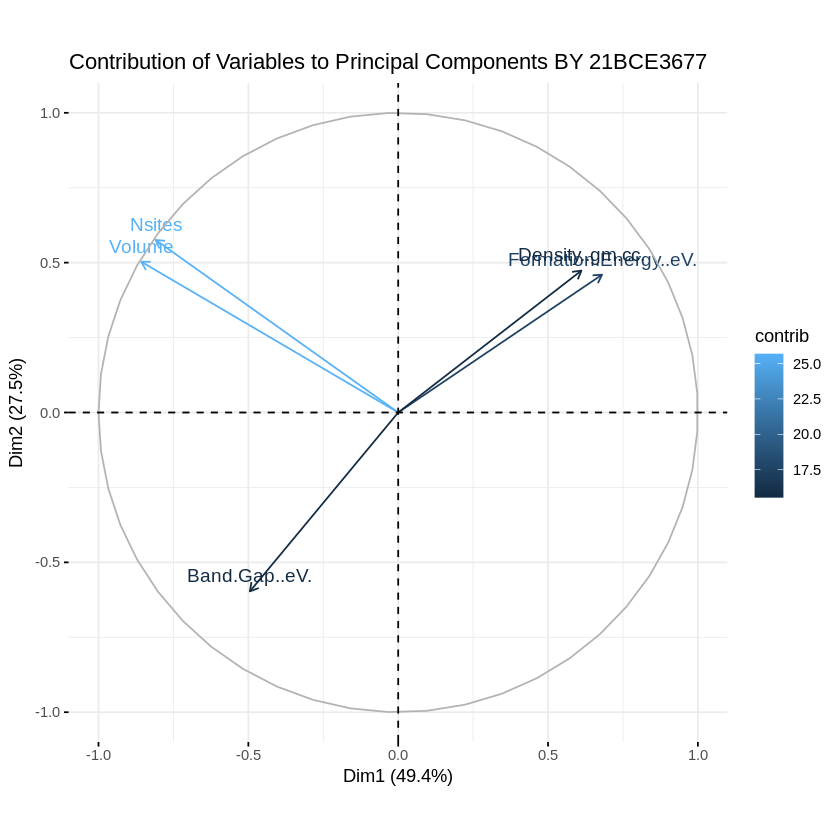

In [26]:
#PCA

if (!require("dplyr")) install.packages("dplyr")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("factoextra")) install.packages("factoextra")

# Load libraries
library(dplyr)
library(ggplot2)
library(factoextra)

# Load the dataset
url <- "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/lithium-ion%20batteries.csv"
data <- read.csv(url)

# Inspect dataset
cat("Dataset Overview:\n")
print(head(data))
cat("\nDataset Structure:\n")
print(str(data))

# Summary of the Dataset
cat("\nSummary of the dataset:\n")
print(summary(data))

# Data Cleaning - Handle Missing Values

data <- na.omit(data)
cat("\nDimensions of the dataset after removing missing values:\n")
print(dim(data))

# Select Numeric Columns for PCA
data_numeric <- data %>% select_if(is.numeric)

# Scaling the Data
data_scaled <- scale(data_numeric)

# Perform PCA
pca_result <- prcomp(data_scaled, scale. = TRUE)

# Summary of PCA - Explained Variance
cat("\nPCA Summary:\n")
print(summary(pca_result))

# Scree Plot to visualize explained variance by each principal component
fviz_eig(pca_result, addlabels = TRUE, ylim = c(0, 50)) +
  ggtitle("Scree Plot of Principal Components BY 21BCE3677")

# Biplot of the first two principal components
print(fviz_pca_biplot(pca_result, geom = "point", repel = TRUE) +
        ggtitle("PCA Biplot - First Two Principal Components BY 21BCE3677"))

# Plot of Individuals on the First Two Principal Components
print(fviz_pca_ind(pca_result, geom = "point", col.ind = "cos2") +
        ggtitle("PCA Plot of Individuals - First Two Components BY 21BCE3677"))

# Contribution of Variables to the First Two Principal Components
print(fviz_pca_var(pca_result, col.var = "contrib") +
        ggtitle("Contribution of Variables to Principal Components BY 21BCE3677"))

# Extract principal components and add to the original dataset for further analysis
pca_data <- as.data.frame(pca_result$x)
data_pca <- cbind(data, pca_data)

# Display the first few rows of the dataset with principal components
cat("\nDataset with Principal Components:\n")
print(head(data_pca))
